# <center> Predicting whether Marketing Campaigns will Success

# Table of Contents

1. **[Step 1 - Environment Preparation](#step1)**
2. **[Step 2 - Data Wrangling](#step2)**
3. **[Step 3 - Exploratory Data Analysis](#step3)**
4. **[Step 4 - Data Modeling with Machine Learning](#step4)**
5. **[Step 5 - Conclusion](#step5)**

<a id="step1"><a/>
# 1. Step 1 - Environment Preparation
Environment Preparation refers to loading essential packages, loading and skimming the dataset.

## 1.1 Import Necessary Packages

In [362]:
# Load Essential Libraries
import sys
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("Pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("Matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import sklearn #collection of machine learning algorithms
print("Scikit-learn version: {}". format(sklearn.__version__))

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "./Bank_Data_20C/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in Bank_Data_20C directory

from subprocess import check_output
print(check_output(["ls", "./Bank_Data_20C"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.7.15 (default, Nov 24 2022, 21:12:53) 
[GCC 11.2.0]
Pandas version: 1.3.5
Matplotlib version: 3.5.3
NumPy version: 1.21.5
SciPy version: 1.7.3
Scikit-learn version: 1.0.2
IPython version: 7.34.0
-------------------------
bank-additional-names.txt
bank.csv
bank-full.csv



## 1.2 Load DataSet from CSV

In [363]:
BANK_DATA_20C_DIR = "./Bank_Data_20C"
BANK_DATA_16C_DIR = "./Bank_Data_16C"
FILE_FULL = "bank-full.csv"
FILE_TEN_PERCENT = "bank.csv"

def print_verbose(info):
    print('-'*100)
    print(info)
    print()

data_20c = pd.read_csv(f"{BANK_DATA_20C_DIR}/{FILE_FULL}", sep=';')
data_16c = pd.read_csv(f"{BANK_DATA_16C_DIR}/{FILE_FULL}", sep=';')

# Use Full Bank Data with 20 features by default
data = data_20c

## 1.3 Skim the Dataset

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [365]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [366]:
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [367]:
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30220,27,blue-collar,single,university.degree,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes
10377,45,management,married,unknown,unknown,no,yes,telephone,jun,mon,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
10572,34,admin.,single,high.school,no,no,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
34710,31,management,single,university.degree,no,yes,no,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
966,44,admin.,married,university.degree,no,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1089,51,admin.,married,basic.6y,unknown,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
5691,29,technician,married,university.degree,no,no,no,telephone,may,mon,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23895,44,admin.,married,high.school,unknown,no,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
11339,37,blue-collar,married,basic.6y,no,yes,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
15900,25,entrepreneur,single,professional.course,no,yes,no,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


<a id="step2"></a>
# 2. Step 2 - Data Wrangling
Data Wrangling refers to the 4C process: Data Correcting, Completing, Creating and Converting.
1) Correcting aberrant values and outliers.
2) Completing missing information.
3) Creating new features for analysis.
4) Converting fields to the correct format for calculations and presentation.

## 2.1 Data Correcting
In this stage, I will 
1. drop ('marital', 'day_of_week', 'month') because these are useless features for prediting the target
2. drop ('poutcome', 'default', 'pdays', 'previous') because there are too many 'nonexistent' or 'unknown' or high-frequent(higher than 90%) values in this column
3. drop ('duration') because in real-time practice there is no duration feature

In [368]:
data_corrected = data.drop(['marital', 'day_of_week', 'month', 'poutcome', 'default', 'pdays', 'previous', 'duration'], axis=1)
# After Drop, there are 14 features left: 5 categorical and 7 numerical

In [369]:
data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   education       41188 non-null  object 
 3   housing         41188 non-null  object 
 4   loan            41188 non-null  object 
 5   contact         41188 non-null  object 
 6   campaign        41188 non-null  int64  
 7   emp.var.rate    41188 non-null  float64
 8   cons.price.idx  41188 non-null  float64
 9   cons.conf.idx   41188 non-null  float64
 10  euribor3m       41188 non-null  float64
 11  nr.employed     41188 non-null  float64
 12  y               41188 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 4.1+ MB


In [370]:
data_corrected.describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [371]:
data_corrected.describe(include=['O'])

,job,education,housing,loan,contact,y
count,41188,41188,41188,41188,41188,41188
unique,12,8,3,3,2,2
top,admin.,university.degree,yes,no,cellular,no
freq,10422,12168,21576,33950,26144,36548


In [372]:
data_corrected.sample(10)

,age,job,education,housing,loan,contact,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39478,75,retired,high.school,no,no,telephone,1,-1.8,93.749,-34.6,0.642,5008.7,yes
33898,32,services,high.school,yes,no,cellular,1,-1.8,92.893,-46.2,1.281,5099.1,no
12230,29,technician,university.degree,yes,no,telephone,1,1.4,93.918,-42.7,4.966,5228.1,no
29499,54,technician,high.school,yes,no,cellular,5,-1.8,93.075,-47.1,1.405,5099.1,no
10420,47,unknown,unknown,no,no,telephone,3,1.4,94.465,-41.8,4.960,5228.1,no
40225,52,admin.,university.degree,yes,yes,cellular,1,-1.7,94.215,-40.3,0.884,4991.6,yes
36051,36,services,high.school,yes,no,cellular,1,-1.8,92.893,-46.2,1.266,5099.1,no
22349,31,technician,professional.course,yes,no,cellular,10,1.4,93.444,-36.1,4.963,5228.1,no
20900,49,blue-collar,basic.4y,yes,no,cellular,1,1.4,93.444,-36.1,4.964,5228.1,no
32031,35,blue-collar,unknown,yes,no,cellular,3,-1.8,92.893,-46.2,1.327,5099.1,yes


## 2.2 Data Completing
There are no explicit missing values for numerical features, but there are implicit missing values for categorical features after dropping ('poutcome', 'default'):
- job: 'unknown' 0.8%
- education: 'unknown' 4.2%
- housing: 'unknown' 2.4%
- loan: 'unknown' 2.4%

In [373]:
def print_percentage(data, column):
    print('-'*50)
    print(f"{column.capitalize()} - All values percentage:")
    print(data[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print_percentage(data_corrected, 'job')
print_percentage(data_corrected, 'education')
print_percentage(data_corrected, 'housing')
print_percentage(data_corrected, 'loan')

--------------------------------------------------
Job - All values percentage:
admin.           25.3%
blue-collar      22.5%
technician       16.4%
services          9.6%
management        7.1%
retired           4.2%
entrepreneur      3.5%
self-employed     3.5%
housemaid         2.6%
unemployed        2.5%
student           2.1%
unknown           0.8%
Name: job, dtype: object
--------------------------------------------------
Education - All values percentage:
university.degree      29.5%
high.school            23.1%
basic.9y               14.7%
professional.course    12.7%
basic.4y               10.1%
basic.6y                5.6%
unknown                 4.2%
illiterate              0.0%
Name: education, dtype: object
--------------------------------------------------
Housing - All values percentage:
yes        52.4%
no         45.2%
unknown     2.4%
Name: housing, dtype: object
--------------------------------------------------
Loan - All values percentage:
no         82.4%
yes     

As we cannot simply fill these 'unknown' values with most frequent values, we can simply drop these rows because these valus account not so much.

In [374]:
def drop_unknown_rows(data, columns):
    for column in columns:
        data = data[data[column]!='unknown']
    return data
data_completed = drop_unknown_rows(data_corrected, ['job', 'education', 'housing', 'loan'])

In [375]:
data_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38311 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38311 non-null  int64  
 1   job             38311 non-null  object 
 2   education       38311 non-null  object 
 3   housing         38311 non-null  object 
 4   loan            38311 non-null  object 
 5   contact         38311 non-null  object 
 6   campaign        38311 non-null  int64  
 7   emp.var.rate    38311 non-null  float64
 8   cons.price.idx  38311 non-null  float64
 9   cons.conf.idx   38311 non-null  float64
 10  euribor3m       38311 non-null  float64
 11  nr.employed     38311 non-null  float64
 12  y               38311 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 4.1+ MB


In [376]:
data_completed.describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000
mean,39.860641,2.567357,0.081943,93.569982,-40.541502,3.622364,5167.400042
std,10.290674,2.769591,1.566247,0.576491,4.624496,1.730500,71.762993
min,17.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [377]:
data_completed.describe(include=['O'])

,job,education,housing,loan,contact,y
count,38311,38311,38311,38311,38311,38311
unique,11,7,2,2,2,2
top,admin.,university.degree,yes,no,cellular,no
freq,9951,11848,20605,32344,24487,34044


In [378]:
data_completed.sample(10)

,age,job,education,housing,loan,contact,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9076,42,blue-collar,high.school,no,yes,telephone,7,1.4,94.465,-41.8,4.866,5228.1,no
14650,45,blue-collar,basic.9y,no,no,cellular,3,1.4,93.918,-42.7,4.961,5228.1,no
37435,29,blue-collar,high.school,yes,no,cellular,1,-2.9,92.201,-31.4,0.879,5076.2,no
12612,36,self-employed,professional.course,no,yes,cellular,5,1.4,93.918,-42.7,4.960,5228.1,no
1878,25,admin.,high.school,yes,no,telephone,2,1.1,93.994,-36.4,4.855,5191.0,no
6364,54,retired,basic.9y,no,no,telephone,2,1.1,93.994,-36.4,4.857,5191.0,no
18342,28,admin.,university.degree,yes,no,cellular,10,1.4,93.918,-42.7,4.968,5228.1,no
31333,44,blue-collar,basic.9y,no,no,cellular,1,-1.8,92.893,-46.2,1.334,5099.1,no
12730,33,blue-collar,basic.4y,no,no,cellular,1,1.4,93.918,-42.7,4.960,5228.1,no
11193,33,services,university.degree,no,no,telephone,1,1.4,94.465,-41.8,4.961,5228.1,no


## 2.3 Data Creating
'age' feature need to be quantized into discrete bins to create new 'age_period' feature:

In [379]:
data_created = data_completed
data_created.insert(0, 'age_period', pd.cut(data_completed['age'].astype(int), 5))
data_created = data_created.drop('age', axis=1)

In [380]:
data_created.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38311 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age_period      38311 non-null  category
 1   job             38311 non-null  object  
 2   education       38311 non-null  object  
 3   housing         38311 non-null  object  
 4   loan            38311 non-null  object  
 5   contact         38311 non-null  object  
 6   campaign        38311 non-null  int64   
 7   emp.var.rate    38311 non-null  float64 
 8   cons.price.idx  38311 non-null  float64 
 9   cons.conf.idx   38311 non-null  float64 
 10  euribor3m       38311 non-null  float64 
 11  nr.employed     38311 non-null  float64 
 12  y               38311 non-null  object  
dtypes: category(1), float64(5), int64(1), object(6)
memory usage: 3.8+ MB


In [381]:
data_created.describe()

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000
mean,2.567357,0.081943,93.569982,-40.541502,3.622364,5167.400042
std,2.769591,1.566247,0.576491,4.624496,1.730500,71.762993
min,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,2.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,43.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [382]:
data_created.describe(include=['category'])

,age_period
count,38311
unique,5
top,"(33.2, 49.4]"
freq,18781


In [383]:
data_created.describe(include=['object'])

,job,education,housing,loan,contact,y
count,38311,38311,38311,38311,38311,38311
unique,11,7,2,2,2,2
top,admin.,university.degree,yes,no,cellular,no
freq,9951,11848,20605,32344,24487,34044


In [384]:
data_created.sample(10)

,age_period,job,education,housing,loan,contact,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32347,"(16.919, 33.2]",admin.,university.degree,no,no,cellular,2,-1.8,92.893,-46.2,1.313,5099.1,no
41036,"(33.2, 49.4]",technician,university.degree,yes,no,telephone,1,-1.1,94.601,-49.5,1.032,4963.6,no
35434,"(16.919, 33.2]",admin.,professional.course,yes,yes,cellular,6,-1.8,92.893,-46.2,1.244,5099.1,no
13475,"(16.919, 33.2]",admin.,university.degree,yes,no,cellular,1,1.4,93.918,-42.7,4.963,5228.1,no
30099,"(33.2, 49.4]",admin.,high.school,no,no,cellular,1,-1.8,93.075,-47.1,1.392,5099.1,no
8883,"(16.919, 33.2]",blue-collar,basic.4y,no,no,telephone,3,1.4,94.465,-41.8,4.866,5228.1,yes
6560,"(16.919, 33.2]",blue-collar,basic.6y,no,no,telephone,2,1.1,93.994,-36.4,4.857,5191.0,no
29772,"(33.2, 49.4]",admin.,university.degree,no,no,cellular,1,-1.8,93.075,-47.1,1.405,5099.1,no
34734,"(33.2, 49.4]",admin.,high.school,yes,no,cellular,2,-1.8,92.893,-46.2,1.266,5099.1,no
19739,"(33.2, 49.4]",technician,high.school,yes,no,cellular,5,1.4,93.444,-36.1,4.966,5228.1,no


## 2.4 Data Converting
There are several categorical object features(age_period, job, education, housing, loan and contact) need to be labeled:
- age_period: (0-16.919, 16.919-33.2, 33.2-49.4, 49.4-65.6, 65.6-98.0)
- job: ('admin', 'blue-collar', 'technician', 'services', 'management', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed', 'student')
- education: ('university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.4y', 'basic.6y', 'illiterate')
- housing ('yes', 'no')
- loan ('yes', 'no')
- contact ('cellular', 'telephone')
- target ('yes', 'no')

In [385]:
data_converted = data_created
label = LabelEncoder()
data_converted['age_period_code'] = label.fit_transform(data_created['age_period'])
data_converted['job_code'] = label.fit_transform(data_created['job'])
data_converted['education_code'] = label.fit_transform(data_created['education'])
data_converted['housing_code'] = label.fit_transform(data_created['housing'])
data_converted['loan_code'] = label.fit_transform(data_created['loan'])
data_converted['contact_code'] = label.fit_transform(data_created['contact'])
data_converted['target'] = label.fit_transform(data_created['y'])
data_converted = data_converted.drop(['age_period', 'job', 'education', 'housing', 'loan', 'contact', 'y'], axis=1)

In [386]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38311 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign         38311 non-null  int64  
 1   emp.var.rate     38311 non-null  float64
 2   cons.price.idx   38311 non-null  float64
 3   cons.conf.idx    38311 non-null  float64
 4   euribor3m        38311 non-null  float64
 5   nr.employed      38311 non-null  float64
 6   age_period_code  38311 non-null  int64  
 7   job_code         38311 non-null  int64  
 8   education_code   38311 non-null  int64  
 9   housing_code     38311 non-null  int64  
 10  loan_code        38311 non-null  int64  
 11  contact_code     38311 non-null  int64  
 12  target           38311 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [387]:
data_converted.describe()

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_period_code,job_code,education_code,housing_code,loan_code,contact_code,target
count,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000,38311.000000
mean,2.567357,0.081943,93.569982,-40.541502,3.622364,5167.400042,0.885907,3.653859,3.612592,0.537835,0.155752,0.360836,0.111378
std,2.769591,1.566247,0.576491,4.624496,1.730500,71.762993,0.742003,3.555654,2.065642,0.498573,0.362624,0.480249,0.314604
min,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,1.000000,7.000000,6.000000,1.000000,0.000000,1.000000,0.000000
max,43.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,4.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [388]:
data_converted.sample(10)

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_period_code,job_code,education_code,housing_code,loan_code,contact_code,target
39744,1,-1.8,93.876,-40.0,0.699,5008.7,1,9,6,1,0,0,1
26352,1,-0.1,93.200,-42.0,4.076,5195.8,1,4,6,1,0,0,0
2228,3,1.1,93.994,-36.4,4.857,5191.0,1,9,2,1,0,1,0
35554,1,-1.8,92.893,-46.2,1.244,5099.1,0,0,3,1,0,0,1
4280,1,1.1,93.994,-36.4,4.856,5191.0,1,9,5,1,0,1,0
9962,6,1.4,94.465,-41.8,4.959,5228.1,0,1,1,0,0,1,0
10962,9,1.4,94.465,-41.8,4.962,5228.1,2,4,6,0,0,1,0
40017,2,-1.7,94.215,-40.3,0.782,4991.6,1,0,3,0,0,0,1
27796,2,-1.8,92.843,-50.0,1.687,5099.1,0,8,0,1,1,0,0
756,3,1.1,93.994,-36.4,4.856,5191.0,0,7,6,1,0,1,0


In [389]:
data_cleaned = data_converted

<a id="step3"></a>
# 3. Step 3 - Exploratory Data Analysis

## 3.1 Uni-Variable Statistics for Numerical Features

### age

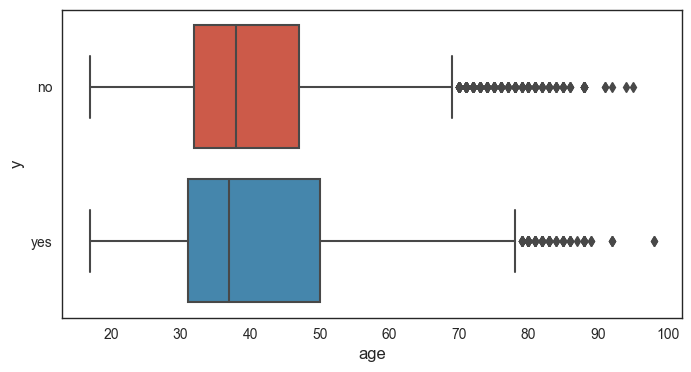

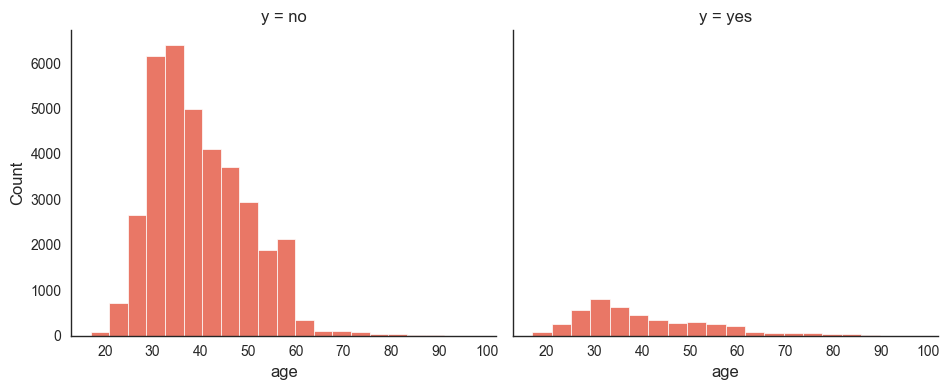

In [390]:
plt.figure(figsize=(8,4))
sns.boxplot(x='age', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.histplot, 'age', bins=20)

### duration

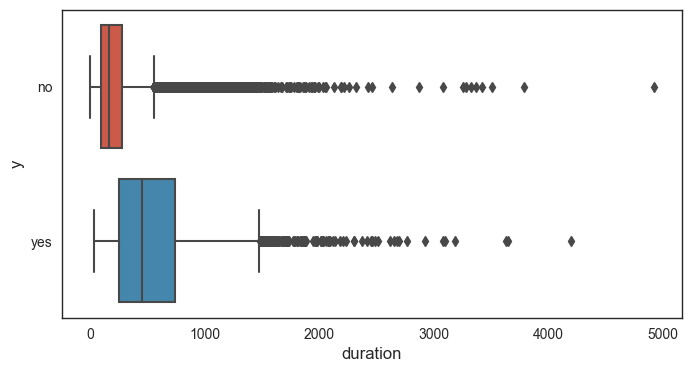

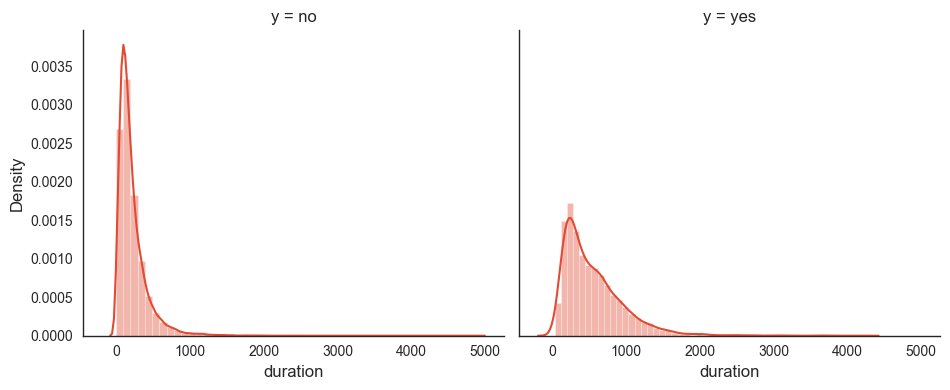

In [391]:
plt.figure(figsize=(8,4))
sns.boxplot(x='duration', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'duration')

### campaign

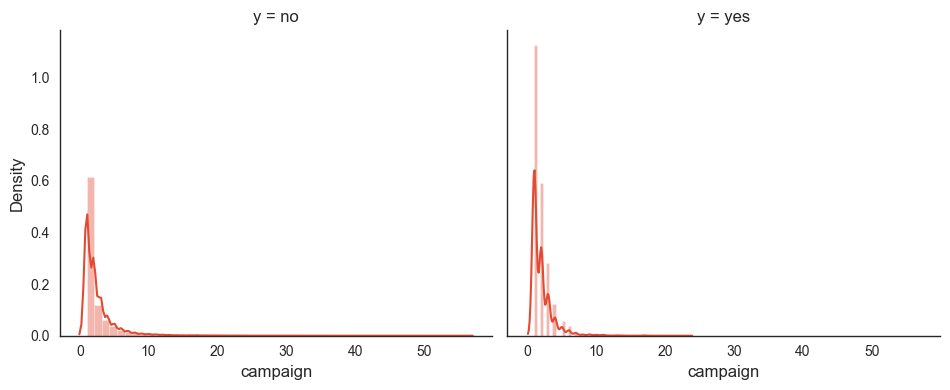

In [392]:
# plt.figure(figsize=(8,4))
# sns.boxplot(x='campaign', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'campaign')

### pdays

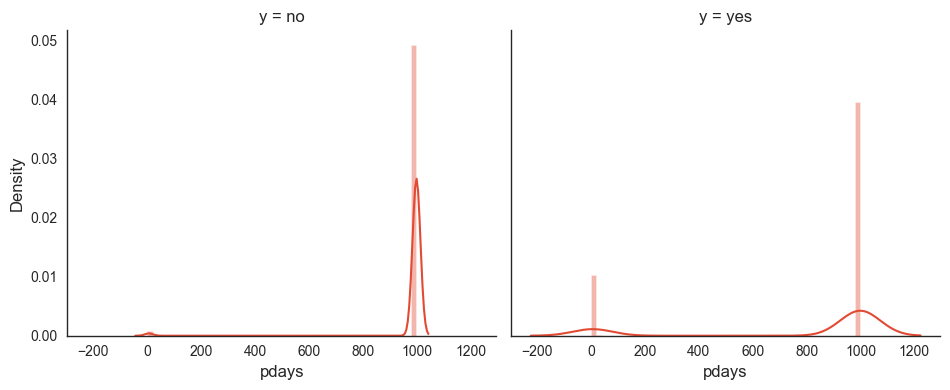

In [393]:
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'pdays')

### previous

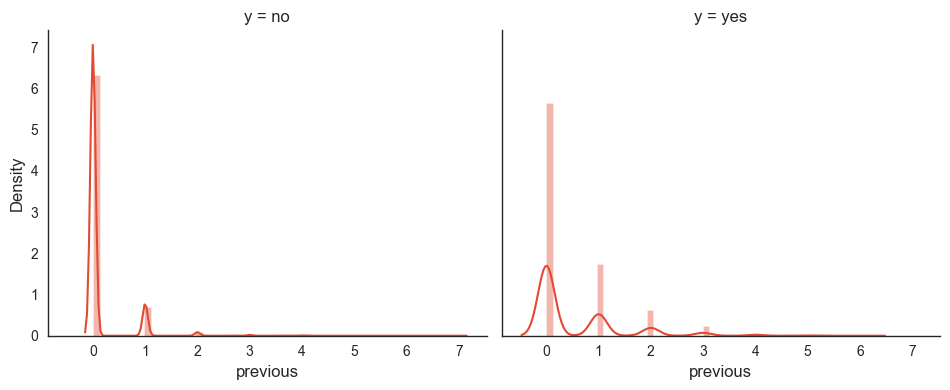

In [394]:
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'previous')

### emp.var.rate

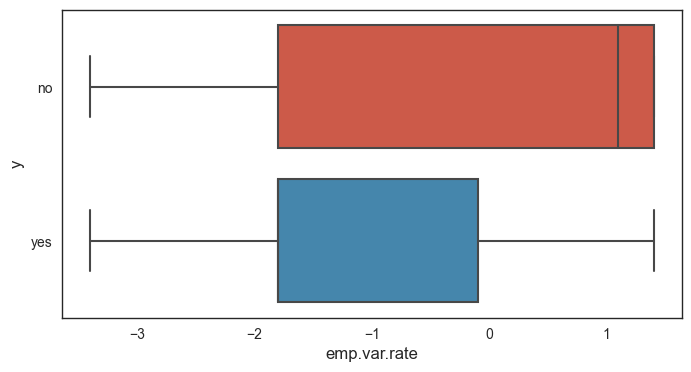

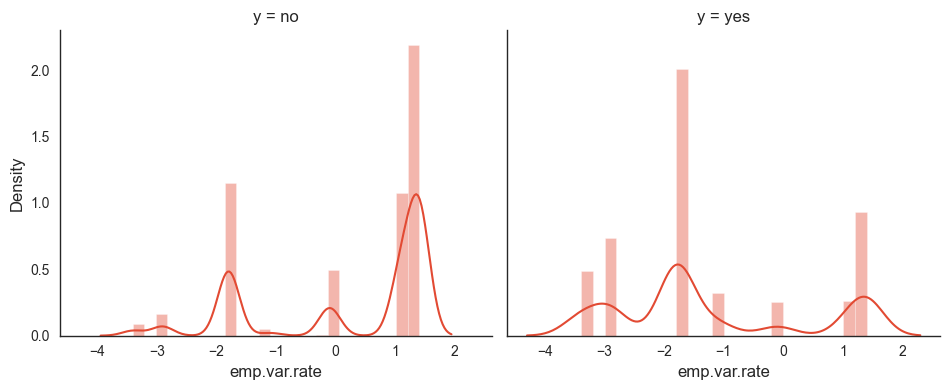

In [395]:
plt.figure(figsize=(8,4))
sns.boxplot(x='emp.var.rate', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'emp.var.rate')

### cons.price.idx

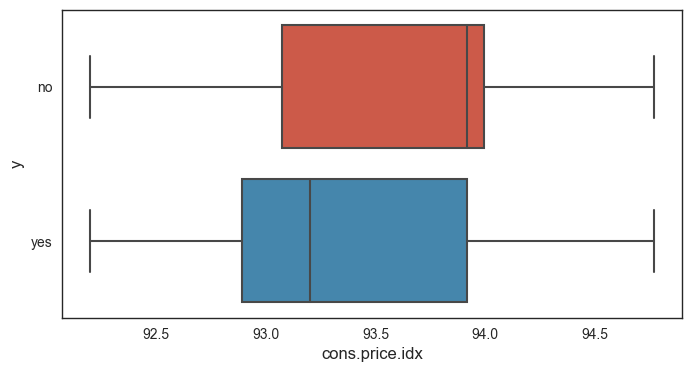

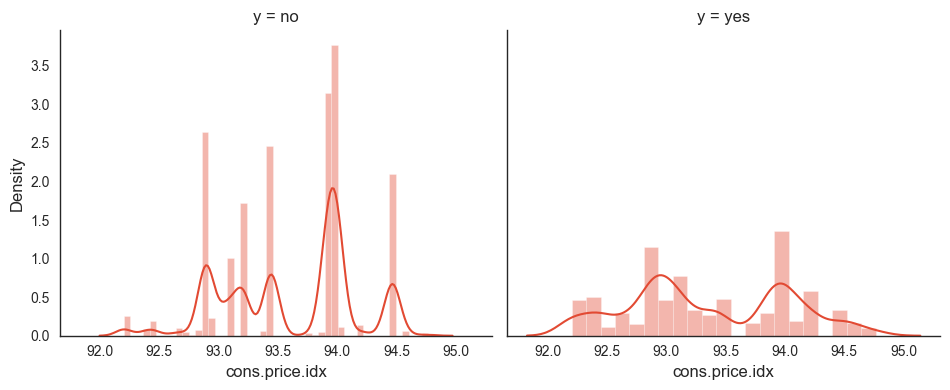

In [396]:
plt.figure(figsize=(8,4))
sns.boxplot(x='cons.price.idx', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'cons.price.idx')

### cons.conf.idx

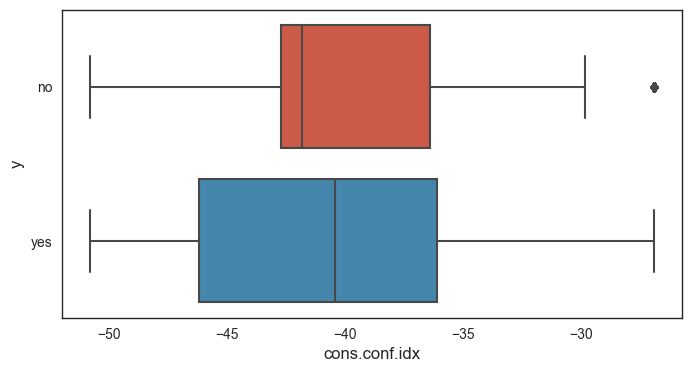

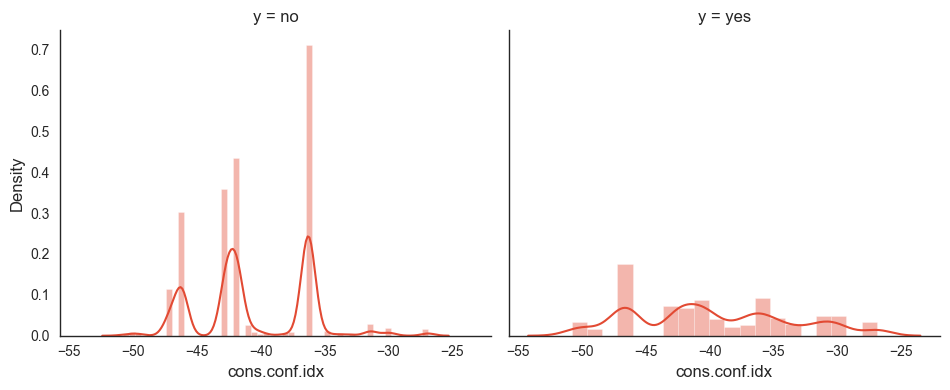

In [397]:
plt.figure(figsize=(8,4))
sns.boxplot(x='cons.conf.idx', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'cons.conf.idx')

### euribor3m

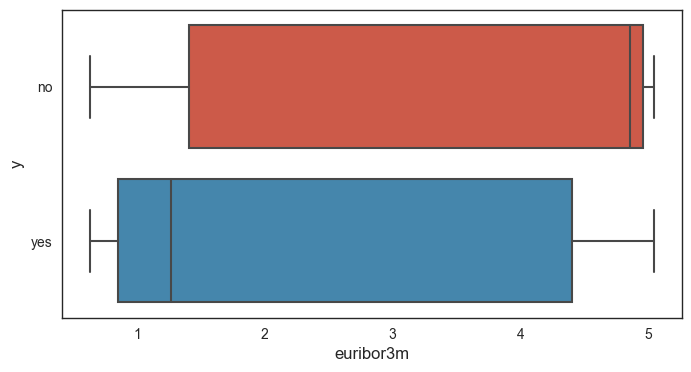

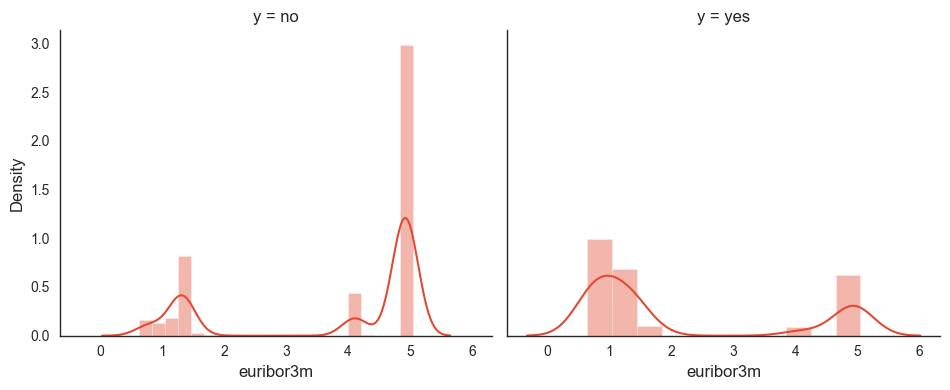

In [398]:
plt.figure(figsize=(8,4))
sns.boxplot(x='euribor3m', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'euribor3m')

### nr.employed

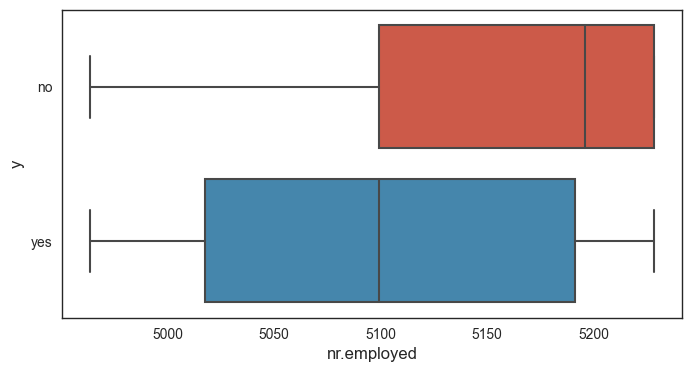

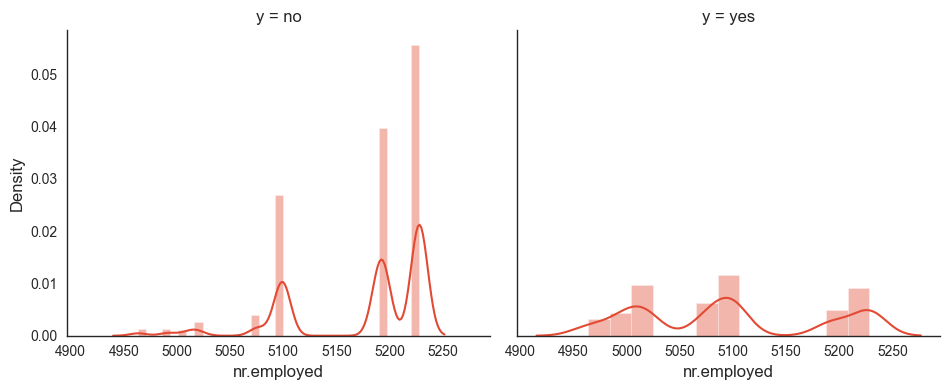

In [399]:
plt.figure(figsize=(8,4))
sns.boxplot(x='nr.employed', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'nr.employed')

## 3.2 Multi-vairable Statistics

<a id="step4"></a>
# 4. Step 4 - Data Modeling with Machine Learning

In [405]:
data_cleaned_x = data_cleaned.drop('target', axis=1)
data_cleaned_y = data_cleaned['target']
data_cleaned_train_x, data_cleaned_test_x, data_cleaned_train_y, data_cleaned_test_y = model_selection.train_test_split(data_cleaned_x, data_cleaned_y, test_size=0.30, random_state = random.randint(0, 10000))

xgb = XGBClassifier()
xgb.fit(data_cleaned_train_x, data_cleaned_train_y)
data_cleaned_test_y_predict = xgb.predict(data_cleaned_test_x)
print(accuracy_score(data_cleaned_test_y, data_cleaned_test_y_predict))

0.8944666782669218


<a id="step5"></a>
# 5. Step 5 - Conclusion